In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Customer-Churn-Prediction.csv')

In [3]:
df2=df.copy()

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.shape

(7043, 21)

In [6]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
df.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

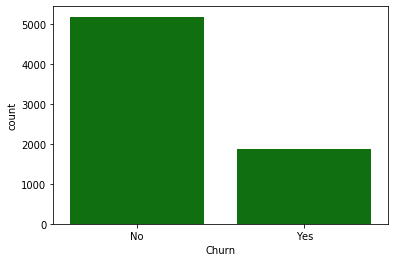

In [9]:
sns.countplot(df['Churn'],color='green');

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.shape

(7043, 21)

# Data Visualization

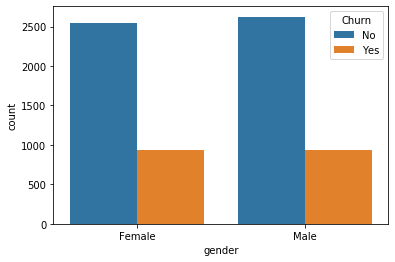

In [12]:
sns.countplot(x='gender',hue='Churn',data=df);

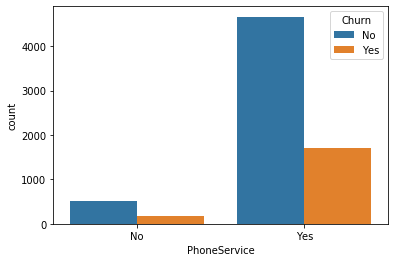

In [13]:
sns.countplot(x='PhoneService',hue='Churn',data=df);

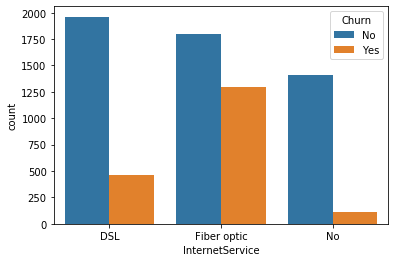

In [14]:
 sns.countplot(x='InternetService',hue='Churn',data=df);

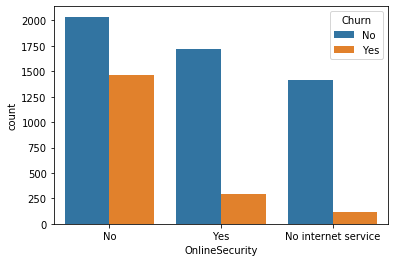

In [15]:
sns.countplot(x='OnlineSecurity',hue='Churn',data=df);

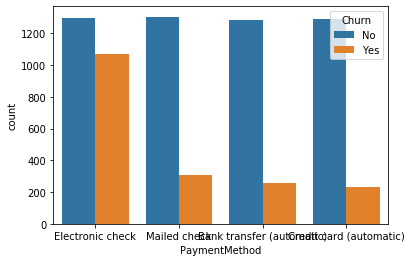

In [16]:
sns.countplot(x='PaymentMethod',hue='Churn',data=df);

# Data Preprocess

In [17]:
df=df.drop('customerID',axis=1)

In [18]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [19]:
df.shape

(7043, 20)

# Encoding

In [20]:
from sklearn.preprocessing import LabelEncoder

In [21]:
label=LabelEncoder()

In [22]:
from pandas.core.dtypes.common import is_numeric_dtype
for column in df.columns:
    if is_numeric_dtype(df[column]):
        continue
    else:
        df[column]=label.fit_transform(df[column])
            

In [23]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925,1


# Seperate x and y 

In [24]:
x=df.drop('Churn',axis=1)

In [25]:
x.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925


In [26]:
x.shape

(7043, 19)

In [27]:
y=df.Churn

In [28]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int32

In [29]:
y.shape

(7043,)

# Imbalanced Data Handling

In [30]:
df.Churn.value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [31]:
not_Churn=(5174/(5174+1869))*100
Churn=(1869/(5174+1869))*100

In [32]:
print('Not churn {} percent of total people'.format(not_Churn))
print('Churn {} percent of total people'.format(Churn))

Not churn 73.4630129206304 percent of total people
Churn 26.536987079369588 percent of total people


In [33]:
churn_no=df[df['Churn']==0]
churn_yes=df[df['Churn']==1]

In [34]:
churn_no.shape

(5174, 20)

In [35]:
churn_yes.shape

(1869, 20)

# Using Synthetic Minority Oversampling Technique (SMOTETomek)

In [36]:
from imblearn.combine import SMOTETomek

In [37]:
sm=SMOTETomek(random_state=42)

In [38]:
X,Y=sm.fit_resample(x,y)

In [39]:
X.shape

(9612, 19)

In [40]:
Y.shape

(9612,)

In [41]:
Y.value_counts()

1    4806
0    4806
Name: Churn, dtype: int64

In [42]:
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925


## Cross validation and Apply Random Forest Classifier

### Hold Out Cross Validation 

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,test_size=0.30,random_state=42)

In [45]:
Xtrain.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
3007,1,0,0,0,22,1,0,1,0,2,0,0,2,2,0,1,3,93.200000,1771
6489,0,0,1,0,13,0,0,0,0,0,0,0,0,0,0,1,2,37.972343,4077
9276,0,0,0,0,23,1,2,1,0,0,1,0,0,1,0,1,2,88.440488,2002
6753,1,1,0,0,7,1,2,1,0,0,0,0,0,0,0,0,2,76.110747,4529
5098,0,0,1,1,70,1,0,2,1,1,1,1,1,1,2,0,0,19.800000,684


In [46]:
Xtest.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
9497,0,0,0,0,57,1,2,1,0,2,1,1,2,2,0,0,2,105.253113,4923
2012,1,1,1,0,71,1,0,1,0,2,2,2,0,2,2,1,1,95.500000,5323
367,1,1,1,1,32,1,0,1,0,2,0,0,2,2,0,1,3,93.950000,2469
9605,0,0,0,0,1,1,1,1,0,0,0,0,2,2,0,0,2,95.581105,6445
4634,1,0,1,0,66,1,2,1,2,0,2,0,2,2,2,1,1,106.050000,5489


In [47]:
Ytrain.head()

3007    0
6489    1
9276    1
6753    1
5098    0
Name: Churn, dtype: int32

In [48]:
Ytest.head()

9497    1
2012    0
367     0
9605    1
4634    1
Name: Churn, dtype: int32

In [49]:
Xtrain.shape

(6728, 19)

In [50]:
Xtest.shape

(2884, 19)

In [51]:
Ytest.shape

(2884,)

In [52]:
from sklearn.ensemble import RandomForestClassifier

In [53]:
rfs= RandomForestClassifier()

In [54]:
rfs.fit(Xtrain,Ytrain)

RandomForestClassifier()

In [55]:
rfs.score(Xtest,Ytest)

0.8671983356449375

### K Fold Cross Validation 

In [56]:
from sklearn.model_selection import KFold, cross_val_score

In [57]:
kfold=KFold(n_splits=10)

In [58]:
result=cross_val_score(rfs,X,Y,cv=kfold)

In [59]:
result

array([0.81808732, 0.82224532, 0.81893861, 0.78668054, 0.80957336,
       0.82206035, 0.85848075, 0.95733611, 0.96670135, 0.95421436])

In [60]:
accuracy=result.mean()

In [61]:
accuracy

0.8614318072174472

### Stratified K fold cross validation 

In [62]:
from sklearn.model_selection import StratifiedKFold

In [63]:
skf=StratifiedKFold(n_splits=5)

In [64]:
result1=cross_val_score(rfs,X,Y,cv=skf)

In [65]:
result1

array([0.74206968, 0.80447218, 0.89646202, 0.91363163, 0.9037461 ])

In [66]:
accuracy=result1.mean()

In [67]:
accuracy

0.8520763223869225

# Near Miss Under Sampling 

In [68]:
 from imblearn.under_sampling import NearMiss

In [69]:
nm=NearMiss()

In [70]:

new_x , new_y = nm.fit_resample(x,y)

In [71]:
new_x.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,0,0,1,1,0,2,1,1,1,1,1,1,0,0,3,20.9,1624
1,1,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,2,69.9,5454
2,1,0,0,0,1,1,0,2,1,1,1,1,1,1,0,0,3,20.2,1610
3,1,0,0,0,1,1,0,2,1,1,1,1,1,1,0,0,3,20.2,1610
4,1,0,0,0,1,1,0,2,1,1,1,1,1,1,0,0,3,20.2,1610


In [72]:
new_x.shape

(3738, 19)

In [73]:
new_y.shape

(3738,)

In [74]:
3738/2

1869.0

In [75]:
new_y.value_counts()

1    1869
0    1869
Name: Churn, dtype: int64

## Cross validation and Apply Random Forest Classifier 

### Hold Out Cross Validation 

In [76]:
from sklearn.model_selection import train_test_split

In [77]:
new_xtrain,new_xtest,new_ytrain,new_ytest=train_test_split(new_x,new_y,test_size=0.30,random_state=42)

In [78]:
new_xtrain.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
2148,1,0,1,0,49,1,2,1,0,2,0,0,2,2,0,1,0,99.05,4093
887,1,0,0,0,45,1,0,0,2,0,2,0,2,2,0,1,2,75.95,2848
2662,1,0,1,0,71,1,2,1,0,2,2,2,2,2,2,1,1,108.60,5864
685,0,1,0,0,9,1,2,1,0,0,2,0,2,0,0,1,2,90.10,6084
413,0,0,1,1,65,1,2,1,2,2,0,2,2,0,2,1,1,99.05,5168


In [79]:
new_xtrain.shape

(2616, 19)

In [80]:
new_ytrain.shape

(2616,)

In [81]:
from sklearn.ensemble import RandomForestClassifier

In [82]:
rf=RandomForestClassifier()

In [83]:
 rf.fit(new_xtrain,new_ytrain)

RandomForestClassifier()

In [84]:
rf.score(new_xtest,new_ytest)

0.6622103386809269

### K Fold cross validation 

In [85]:
from sklearn.model_selection import KFold,cross_val_score

In [86]:
kfold1=KFold(n_splits=5)

In [87]:
 score=cross_val_score(rf,new_x,new_y,cv=kfold1)

In [88]:
score

array([0.37299465, 0.49197861, 0.64839572, 0.47389558, 0.49129853])

In [89]:
accuracy=score.mean()

In [90]:
accuracy

0.4957126187459284

### Stratified K Fold cross validation 

In [91]:
from sklearn.model_selection import StratifiedKFold

In [92]:
st=StratifiedKFold()

In [93]:
score1=cross_val_score(rf,new_x,new_y,cv=st)

In [94]:
score1

array([0.48128342, 0.68716578, 0.65909091, 0.65060241, 0.65997323])

In [95]:
accuracy=score1.mean()

In [96]:
accuracy

0.6276231485657424

# Over Sampling

In [97]:
from imblearn.over_sampling import RandomOverSampler

In [98]:
over=RandomOverSampler(random_state=42)

In [99]:
x_new,y_new=over.fit_resample(x,y)

In [100]:
x_new.shape

(10348, 19)

In [101]:
y_new.shape

(10348,)

In [102]:
y_new.value_counts()

1    5174
0    5174
Name: Churn, dtype: int64

## Cross Validation and Apply Random Forest Classifier 

### Hold out cross validation

In [103]:
from sklearn.model_selection import train_test_split

In [104]:
x_newtrain,x_newtest,y_newtrain,y_newtest=train_test_split(x_new,y_new,test_size=0.30,random_state=42)

In [105]:
x_newtrain.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
8969,1,0,0,0,66,1,0,1,0,2,2,0,2,2,0,0,2,99.50,5324
7136,0,0,0,1,1,1,0,0,2,2,0,2,0,0,0,1,2,60.00,4910
3668,1,0,1,0,22,1,0,0,2,0,0,0,2,0,1,1,0,59.75,675
1701,0,0,1,1,66,1,2,1,0,2,2,0,2,2,1,1,1,102.45,5277
3143,1,0,1,1,13,1,2,0,0,2,2,2,2,0,0,1,2,72.80,6396


In [106]:
x_newtrain.shape

(7243, 19)

In [107]:
y_newtrain.shape

(7243,)

In [108]:
from sklearn.ensemble import RandomForestClassifier

In [109]:
rf1=RandomForestClassifier()

In [110]:
rf1.fit(x_newtrain,y_newtrain)

RandomForestClassifier()

In [111]:
rf1.score(x_newtest,y_newtest)

0.8888888888888888

### K Fold Cross Validation

In [112]:
from sklearn.model_selection import KFold,cross_val_score

In [113]:
kfold2=KFold(n_splits=5)

In [114]:
cross=cross_val_score(rf1,x_new,y_new,cv=kfold2)

In [115]:
cross

array([0.85217391, 0.84154589, 0.84057971, 0.93523441, 0.99516675])

In [116]:
accuracy=cross.mean()

In [117]:
accuracy

0.892940135377776

### Stratified K fold cross validation 

In [118]:
from sklearn.model_selection import StratifiedKFold

In [119]:
st1=StratifiedKFold()

In [120]:
cross1=cross_val_score(rf1,x_new,y_new,cv=st1)

In [121]:
cross1

array([0.88550725, 0.88309179, 0.90772947, 0.91445143, 0.919768  ])

In [122]:
accuracy=cross1.mean()

In [123]:
accuracy

0.9021095864183263